In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import pickle
import os
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/drive/My Drive/Traffic'

In [ ]:
%cd /content/drive/My\ Drive/Traffic

/content/drive/My Drive/Traffic


In [ ]:
# !unzip myData.zip

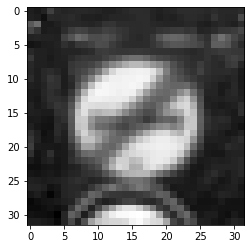

In [ ]:
base_dir = os.path.join("myData")

for i in os.listdir(base_dir):
    myPictList = os.path.join(base_dir,i)
    for j in os.listdir(myPictList):
        img = cv2.imread(os.path.join(myPictList,j), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img, cmap="gray")
        plt.show()
        break
    break

In [ ]:
# training_data = []

# def create_training_data():
#   for i in os.listdir(base_dir):
#       myPictList = os.path.join(base_dir,i)
#       print(i, end=" ")
#       for j in os.listdir(myPictList):
#           img = cv2.imread(os.path.join(myPictList,j))
#           training_data.append([img, i])
                     
# create_training_data()

In [ ]:
# len(training_data)

In [ ]:
# import pickle

# pickle_out = open('training_data_traffic.pickle', 'wb')
# pickle.dump(training_data, pickle_out)
# pickle_out.close()

In [ ]:
pickle_in = open('training_data_traffic.pickle', 'rb')
training_data_pickle = pickle.load(pickle_in)

In [ ]:
len(training_data_pickle)

34799

In [ ]:
features = []
labels = []

for feature, label in training_data_pickle:
  features.append(feature)
  labels.append(label)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=7, test_size=0.2)

In [ ]:
print(len(features))
print(len(labels))

34799
34799


In [ ]:
X_train = np.array(X_train).reshape(-1,32,32,3)
X_train = X_train/255.0

In [ ]:
import tensorflow as tf

resnet = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(32,32,3))

resnet.trainable = False

In [ ]:
# model = tf.keras.models.Sequential([
#     resnet,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(43, activation="softmax")
# ])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0

In [ ]:
features[0].shape

(32, 32, 3)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy")>0.99):
            print(" Reached 99% Accuracy")
            self.model.stop_training = True

callbacks = myCallback()

# uncheck this if model fit doesn't run
labels = np.array(labels)
# features = np.array(features)

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# print(set(labels))
# print(len(set(labels)))

In [ ]:
from time import time
# sebelum aku coba train test split (hold out) val accuracy 0.0500 dan seteleah menggunakan hold out val accuracy dapat bertambah banyak !!!

t1 = time()
model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=30, callbacks=[callbacks])

Epoch 1/30
348/348 [==============================] - 83s 239ms/step - loss: 1.8560 - accuracy: 0.4883 - val_loss: 0.4071 - val_accuracy: 0.8791
Epoch 2/30
348/348 [==============================] - 83s 238ms/step - loss: 0.4466 - accuracy: 0.8613 - val_loss: 0.1411 - val_accuracy: 0.9637
Epoch 3/30
348/348 [==============================] - 83s 238ms/step - loss: 0.2329 - accuracy: 0.9262 - val_loss: 0.0770 - val_accuracy: 0.9822
Epoch 4/30
348/348 [==============================] - 83s 238ms/step - loss: 0.1619 - accuracy: 0.9487 - val_loss: 0.0611 - val_accuracy: 0.9849
Epoch 5/30
348/348 [==============================] - 82s 237ms/step - loss: 0.1254 - accuracy: 0.9605 - val_loss: 0.0493 - val_accuracy: 0.9896
Epoch 6/30
348/348 [==============================] - 86s 248ms/step - loss: 0.1056 - accuracy: 0.9687 - val_loss: 0.0438 - val_accuracy: 0.9894
Epoch 7/30
348/348 [==============================] - 83s 238ms/step - loss: 0.0848 - accuracy: 0.9744 - val_loss: 0.0380 - val_ac

In [ ]:
print(f"Training time: {round(time()-t1)} second")

Training time: 1918 second


In [ ]:
# def grayscale(img):
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     return img
# def equalize(img):
#     img =cv2.equalizeHist(img)
#     return img
# def preprocessing(img):
#     img = grayscale(img)
#     img = equalize(img)
#     img = img/255
#     return img
# def getCalssName(classNo):
#     if   classNo == 0: print('Speed Limit 20 km/h')
#     elif classNo == 1: print('Speed Limit 30 km/h')
#     elif classNo == 2: print('Speed Limit 50 km/h')
#     elif classNo == 3: print('Speed Limit 60 km/h')
#     elif classNo == 4: print('Speed Limit 70 km/h')
#     elif classNo == 5: print('Speed Limit 80 km/h')
#     elif classNo == 6: print('End of Speed Limit 80 km/h')
#     elif classNo == 7: print('Speed Limit 100 km/h')
#     elif classNo == 8: print('Speed Limit 120 km/h')
#     elif classNo == 9: print('No passing')
#     elif classNo == 10: print('No passing for vechiles over 3.5 metric tons')
#     elif classNo == 11: print('Right-of-way at the next intersection')
#     elif classNo == 12: print('Priority road')
#     elif classNo == 13: print('Yield')
#     elif classNo == 14: print('Stop')
#     elif classNo == 15: print('No vechiles')
#     elif classNo == 16: print('Vechiles over 3.5 metric tons prohibited')
#     elif classNo == 17: print('No entry')
#     elif classNo == 18: print('General caution')
#     elif classNo == 19: print('Dangerous curve to the left')
#     elif classNo == 20: print('Dangerous curve to the right')
#     elif classNo == 21: print('Double curve')
#     elif classNo == 22: print('Bumpy road')
#     elif classNo == 23: print('Slippery road')
#     elif classNo == 24: print('Road narrows on the right')
#     elif classNo == 25: print('Road work')
#     elif classNo == 26: print('Traffic signals')
#     elif classNo == 27: print('Pedestrians')
#     elif classNo == 28: print('Children crossing')
#     elif classNo == 29: print('Bicycles crossing')
#     elif classNo == 30: rprint('Beware of ice/snow')
#     elif classNo == 31: print('Wild animals crossing')
#     elif classNo == 32: print('End of all speed and passing limits')
#     elif classNo == 33: print('Turn right ahead')
#     elif classNo == 34: print('Turn left ahead')
#     elif classNo == 35: print('Ahead only')
#     elif classNo == 36: print('Go straight or right')
#     elif classNo == 37: print('Go straight or left')
#     elif classNo == 38: print('Keep right')
#     elif classNo == 39: rprint('Keep left')
#     elif classNo == 40: print('Roundabout mandatory')
#     elif classNo == 41: print('End of no passing')
#     elif classNo == 42: print('End of no passing by vechiles over 3.5 metric tons')

In [ ]:
# from tensorflow.keras.preprocessing import image

# test_dir = os.path.join("Images")

# test_names = os.listdir(test_dir)
# print(test_names)

In [ ]:
# for i in test_names:
#     path = os.path.join(test_dir, i)
#     img = image.load_img(path, target_size=(32,32), color_mode='rgb')
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0) 
#     x = x/255.0
    
#     images = np.vstack([x])
#     classes = model.predict(images, batch_size=10)
#     probabilityValue =np.argmax(classes)

#     print(f"Image: {i} =", end=" ")
#     getCalssName(probabilityValue)